In [1]:
#####################################################################
#
#                           PID Control
#
#####################################################################

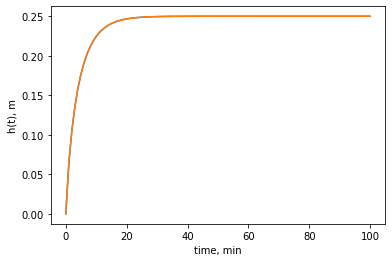

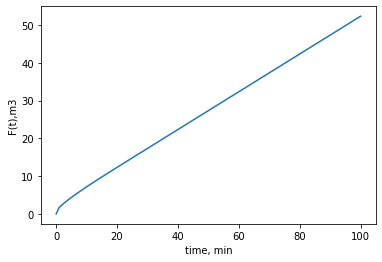

In [7]:
# Basic example of PID Control in a tank

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# initial condition
# y0 = input("Please enter here")
y0 = 0 # m
# function that return dy/dt
def tank(h,t):
    F0 = 1 # m**3/min
    A = 10 # m**2
    beta = 2 # 
    dhdt = F0/A - beta/A*np.sqrt(h) # m/min
    return dhdt

# time points 

t = np.linspace(0,100,101)
F0 = 1 # m**3/min

# solve ODE

y = odeint(tank, y0, t)

ns = len(t)

ysp = 0.5

epp_0 = 0
ep_0 = 0
ep = 0
kc = 2
tauI = 1
tauD = 0

F0_ctrl = 0

yd0 = y0
ydf = []
F0_ctrl_t = []
F0_ctrl_t.append(float(0))
ydf.append(float(y0))

for i in range(0,ns-1):
    # if i > 25:
    #     F0 = 1 - 0.5 
    ts = [t[i], t[i+1]]
    F0 = F0_ctrl
    yd = odeint(tank, yd0,ts)
    yd0 = yd[-1]
    ydf.append(float(yd0))
    
    ## PID
    
    delta_t = t[i+1]-t[i]
    
    epp_0 = 0
    ep_0 = ep
    ep = ysp - yd0
    delta_u = kc*((ep-ep_0) + ep/float(tauI)*delta_t + tauD/float(delta_t)*(ep-2*ep_0+epp_0))
    F0_ctrl = F0_ctrl + delta_u
    F0_ctrl_t.append(float(F0_ctrl))

#print('altura', y_tf,"m")

# plot results

plt.plot(t,y,t,ydf)
plt.xlabel('time, min')
plt.ylabel('h(t), m')
plt.show()

plt.plot(t[0:101], F0_ctrl_t)
plt.xlabel('time, min')
plt.ylabel('F(t),m3')
plt.show()
